Demonstrates the Deutsch-Jozsa algorithm.
The Deutsch-Jozsa algorithm takes a black-box oracle implementing 
a function $f(x)$, $x$ is a vector with all elements equal to 0 or 1, and the
algorithm finds whether $f(x)$ is a balanced function or constant in a single query to the oracle.

In [5]:
!pip install cirq --quiet

In [6]:
import cirq
import random

from cirq import H, X, CNOT, measure
from cirq.contrib.svg import SVGCircuit

%matplotlib inline
import matplotlib.pyplot as plt

In [98]:
def qunatum_oracle (input_qubits, output_qubit, secret_factor_bits, quibit_number):
    for qubit, bit in zip(input_qubits, secret_factor_bits):
      if bit and qubit != input_qubits[quibit_number - 1]: 
        yield [CNOT(qubit, output_qubit), X(output_qubit)] 
      
      if bit and qubit == input_qubits[quibit_number - 1]:
        yield CNOT(qubit, output_qubit)       

In [99]:
def deutch_jozsa_circuit(input_qubits, output_qubit, oracle):
    """Solves for factors in f(x) with one query."""
    c = cirq.Circuit()
    # First qubits
    c.append([X(output_qubit), H(output_qubit), H.on_each(*input_qubits)]);  
    # query oracle
    c.append(oracle);
    # Measure in X basis.
    c.append([H.on_each(*input_qubits), measure(*input_qubits, key='result')]);
    return c; 

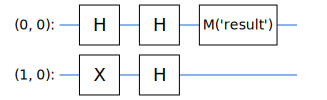

In [100]:
# Nuber of quibits
quibit_number = 2

# Choose qubits to use.

input_qubits = [cirq.GridQubit(i,0) for i in range(quibit_number)]
output_qubit = cirq.GridQubit(quibit_number,0)

#Initializing secret function 
# Secret function: f(x) 
secret_factor_bits = [random.randint(0, 1) for _ in range(quibit_number+1)]
 # Implementing oracle
#oracle = qunatum_oracle(input_qubits, output_qubit, secret_factor_bits, quibit_number)
# Deutsch-Jozsa circuit
#circuit = deutch_jozsa_circuit(input_qubits, output_qubit, oracle)
SVGCircuit(circuit)

In [102]:
print('Secret function:\nf(x) = <{}>'.format(', '.join(str(e) for e in secret_factor_bits)))

Secret function:
f(x) = <1, 0, 0>


In [103]:
def bitstring(bits):
    return ''.join(str(int(b)) for b in bits)

In [104]:
# Simulate the circuit.
simulator = cirq.Simulator()
# Repetitions
#circuit_sample_count = 3
result = simulator.run(circuit) 
print('Result of f(0)⊕f(1):')
print(result)

Result of f(0)⊕f(1):
result=0


In [53]:
frequencies = result.histogram(key='result', fold_func=bitstring)
print('Sampled results:\n{}'.format(frequencies))

Sampled results:
Counter({'000': 1})


In [ ]:
def main():
    # Choose qubits to use.
    q0, q1 = cirq.LineQubit.range(2)

    # Pick a secret 2-bit function and create a circuit to query the oracle.
    secret_function = [random.randint(0, 1) for _ in range(2)]
    oracle = make_oracle(q0, q1, secret_function)
    print('Secret function:\nf(x) = <{}>'.format(
        ', '.join(str(e) for e in secret_function)))

    # Embed the oracle into a quantum circuit querying it exactly once.
    circuit = make_deutsch_circuit(q0, q1, oracle)
    print('Circuit:')
    print(circuit)

    # Simulate the circuit.
    simulator = cirq.Simulator()
    result = simulator.run(circuit)
    print('Result of f(0)⊕f(1):')
    print(result)


def make_oracle(q0, q1, secret_function):
    """ Gates implementing the secret function f(x)."""

    # coverage: ignore
    if secret_function[0]:
        yield [CNOT(q0, q1), X(q1)]

    if secret_function[1]:
        yield CNOT(q0, q1)


def make_deutsch_circuit(q0, q1, oracle):
    c = cirq.Circuit()

    # Initialize qubits.
    c.append([X(q1), H(q1), H(q0)])

    # Query oracle.
    c.append(oracle)

    # Measure in X basis.
    c.append([H(q0), measure(q0, key='result')])
    return c


if __name__ == '__main__':
    main()

Secret function:
f(x) = <1, 1>
Circuit:
0: ───H───────@───────@───H───M('result')───
              │       │
1: ───X───H───X───X───X─────────────────────
Result of f(0)⊕f(1):
result=0
